### Imports and loading data

In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
from library import helper
from library import plots
import imageio
import os
percent_of_side = 0.05

In [2]:
# Import images
_, blue = cv2.imreadmulti('data/Blue-34a-dbl_0002.tiff', [], cv2.IMREAD_UNCHANGED)
_, red = cv2.imreadmulti('data/Red-34a-dbl_0002.tiff', [], cv2.IMREAD_UNCHANGED)
_, composite = cv2.imreadmulti('data/Composite-34a-dbl_0002.tiff', [], cv2.IMREAD_GRAYSCALE)
# List of tuples of the form (blue, red, composite) 
blue_composite = [(blue[i], composite[i]) for i in range(len(composite))]#[90:95]
red_composite = [(red[i], composite[i]) for i in range(len(composite))]#[90:95]
red_blue_composite = [(red[i], blue[i], composite[i]) for i in range(len(composite))]#[90:95]

In [3]:
#Intensity images
images = []
# for idx, cmp in enumerate(composite):
for idx, (blue,cmp) in enumerate(blue_composite):
    if idx < len(composite)*percent_of_side or idx > len(composite)*(1-percent_of_side):
        point = helper.get_intensity_pictures(cmp, outer_bool=True)
    else:
        point = helper.get_intensity_pictures(cmp)
    images.append(point)
#Blue
points_blue = []
for idx, (bl, cmp) in enumerate(blue_composite):
    if idx < len(blue_composite)*percent_of_side or idx > len(blue_composite)*(1-percent_of_side):
        point = helper.get_intensity_points(bl, cmp, outer_bool=True)
    else:
        point = helper.get_intensity_points(bl, cmp)
    points_blue.append(point)

#Red
points_red = []
for idx, (rd, cmp) in enumerate(red_composite):
    if idx < len(red_composite)*percent_of_side or idx > len(red_composite)*(1-percent_of_side):
        point = helper.get_intensity_points(rd, cmp, outer_bool=True)
    else:
        point = helper.get_intensity_points(rd, cmp)
    points_red.append(point)

#Red and Blue
points_comp = []
for idx, (rd, cmp) in enumerate(red_composite):
    if idx < len(red_composite)*percent_of_side or idx > len(red_composite)*(1-percent_of_side):
        point = helper.get_intensity_points(cmp, cmp, outer_bool=True)
    else:
        point = helper.get_intensity_points(cmp, cmp)
    points_comp.append(point)

# Red/Blue
points_norm = []
for idx, (rd, bl) in enumerate(zip(points_red, points_blue)):
    points_norm.append((rd[0]/bl[0], rd[1]/bl[1]))

# Red/Blue log
points_norm_log = []
for idx, (rd, bl) in enumerate(zip(points_red, points_blue)):
    points_norm_log.append((np.log(rd[0]/bl[0]), np.log(rd[1]/bl[1])))

/var/folders/9m/qcg58ft12w72z4h1j7s196w00000gn/T/ipykernel_81150/2582031570.py:40: RuntimeWarning: invalid value encountered in true_divide
  points_norm.append((rd[0]/bl[0], rd[1]/bl[1]))
/var/folders/9m/qcg58ft12w72z4h1j7s196w00000gn/T/ipykernel_81150/2582031570.py:45: RuntimeWarning: invalid value encountered in true_divide
  points_norm_log.append((np.log(rd[0]/bl[0]), np.log(rd[1]/bl[1])))


In [4]:
def single_color_total_dist(i,data):
        total = np.concatenate((data['points_comp'][i][0], data['points_comp'][i][1]))
        plt.hist(total, bins=100, color='b', alpha=0.5, label='Total')
        # plt.axvline((total).mean(), color='b', linestyle='dashed', linewidth=1)
        plt.axvline(np.median(total), color='b', linestyle='dashed', linewidth=1)
        data['comp_mean'].append((total).mean())
        data['comp_median'].append(np.median(total))
        data['comp_cv'].append(np.std(total)/np.mean(total))
        plt.legend(loc='upper right')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title(f'Frequency of Pixel Intensities at {i}')

def single_color_segment_dist(i,data):
        # Outer
        plt.hist(data['points_comp'][i][0], bins=100, color='g', alpha=0.5, label='Outer')
        plt.axvline((data['points_comp'][i][0]).mean(), color='g', linestyle='dashed', linewidth=1)
        data['outer_mean'].append((data['points_comp'][i][0]).mean())
        data['outer_cv'].append(np.std(data['points_comp'][i][0])/np.mean(data['points_comp'][i][0]))

        # Inner
        plt.hist(data['points_comp'][i][1], bins=100, color='c', alpha=0.5, label='Inner')
        plt.axvline((data['points_comp'][i][1]).mean(), color='c', linestyle='dashed', linewidth=1)
        data['inner_mean'].append((data['points_comp'][i][1]).mean())
        data['inner_cv'].append(np.std(data['points_comp'][i][1])/np.mean(data['points_comp'][i][1]))

        plt.legend(loc='upper right')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title(f'Frequency of Pixel Intensities at {i}')

### No segmentation distribution for red and blue baseline

Text(0.5, 1.0, 'CV of Red Image')

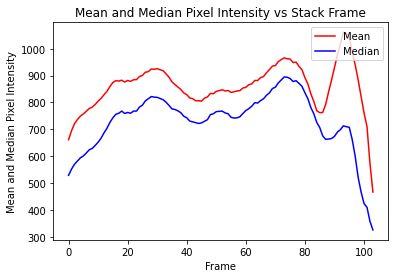

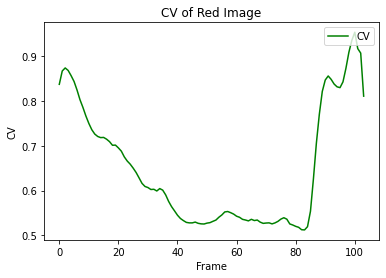

In [59]:
# Red distribution gif
name_of_file = 'total_red.gif'
plotting_function = single_color_total_dist
data = {}
data['points_comp'] = points_red
data['comp_mean'] = []
data['comp_median'] = []
data['comp_cv'] = []
plots.create_gif(name_of_file, plotting_function, percent_of_side, images, data, no_images=True)

# Median and mean vs frame
plt.plot(data['comp_mean'], label='Mean', color='r')
plt.plot(data['comp_median'], label='Median', color='b')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('Mean and Median Pixel Intensity')
plt.title(f'Mean and Median Pixel Intensity vs Stack Frame')
plt.figure()

# CV vs frame
plt.plot(data['comp_cv'], label='CV', color='g')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('CV')
plt.title(f'CV of Red Image')

Text(0.5, 1.0, 'CV of Blue Image')

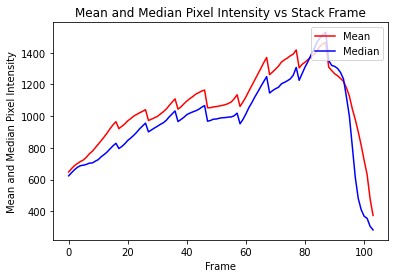

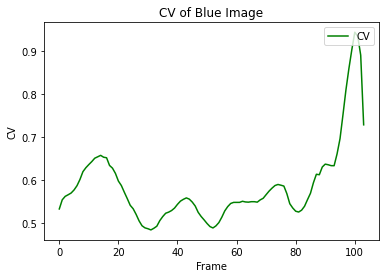

In [60]:
# Blue distribution gif
name_of_file = 'total_blue.gif'
plotting_function = single_color_total_dist
data = {}
data['points_comp'] = points_blue
data['comp_mean'] = []
data['comp_median'] = []
data['comp_cv'] = []
plots.create_gif(name_of_file, plotting_function, percent_of_side, images, data, no_images=True)

# Median and mean vs frame
plt.plot(data['comp_mean'], label='Mean', color='r')
plt.plot(data['comp_median'], label='Median', color='b')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('Mean and Median Pixel Intensity')
plt.title(f'Mean and Median Pixel Intensity vs Stack Frame')
plt.figure()

# CV vs frame
plt.plot(data['comp_cv'], label='CV', color='g')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('CV')
plt.title(f'CV of Blue Image')

Text(0.5, 1.0, 'CV of Norm Image')

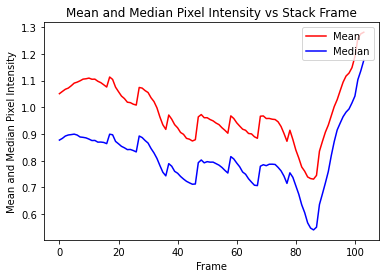

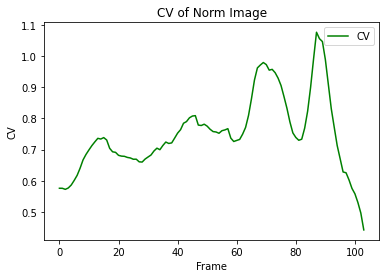

In [61]:
# Norm distribution gif
name_of_file = 'total_norm.gif'
plotting_function = single_color_total_dist
data = {}
data['points_comp'] = points_norm
data['comp_mean'] = []
data['comp_median'] = []
data['comp_cv'] = []
plots.create_gif(name_of_file, plotting_function, percent_of_side, images, data, no_images=True)

# Median and mean vs frame
plt.plot(data['comp_mean'], label='Mean', color='r')
plt.plot(data['comp_median'], label='Median', color='b')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('Mean and Median Pixel Intensity')
plt.title(f'Mean and Median Pixel Intensity vs Stack Frame')
plt.figure()

# CV vs frame
plt.plot(data['comp_cv'], label='CV', color='g')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('CV')
plt.title(f'CV of Norm Image')

Text(0.5, 1.0, 'CV of Norm Image')

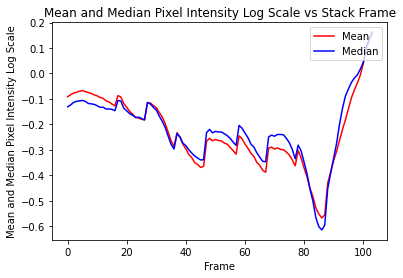

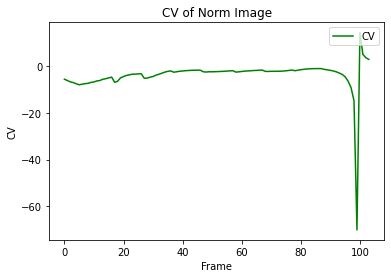

In [63]:
# Norm distribution gif log
name_of_file = 'total_norm_log.gif'
plotting_function = single_color_total_dist
data = {}
data['points_comp'] = points_norm_log
data['comp_mean'] = []
data['comp_median'] = []
data['comp_cv'] = []
plots.create_gif(name_of_file, plotting_function, percent_of_side, images, data, no_images=True)

# Median and mean vs frame
plt.plot(data['comp_mean'], label='Mean', color='r')
plt.plot(data['comp_median'], label='Median', color='b')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('Mean and Median Pixel Intensity Log Scale')
plt.title(f'Mean and Median Pixel Intensity Log Scale vs Stack Frame')
plt.figure()

# CV vs frame
plt.plot(data['comp_cv'], label='CV', color='g')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('CV')
plt.title(f'CV of Norm Image')

### Segmented images distribution for red and blue

Text(0.5, 1.0, 'CV vs Stack Frame')

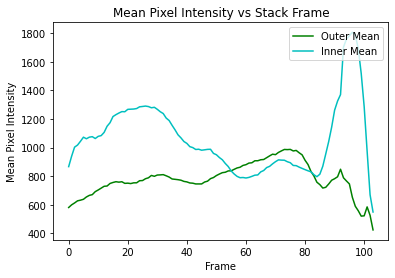

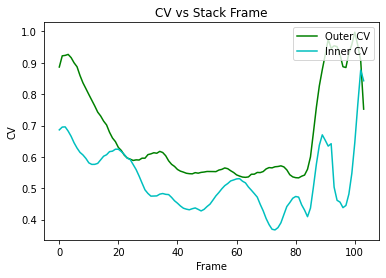

In [70]:
# Red segmented distribution gif
name_of_file = 'segmented_red.gif'
plotting_function = single_color_segment_dist
data = {}
data['points_comp'] = points_red
data['outer_mean'] = []
data['inner_mean'] = []
data['outer_cv'] = []
data['inner_cv'] = []
plots.create_gif(name_of_file, plotting_function, percent_of_side, images, data, no_images=True)

# Outer and inner mean vs frame
plt.plot(data['outer_mean'], label='Outer Mean', color='g')
plt.plot(data['inner_mean'], label='Inner Mean', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('Mean Pixel Intensity')
plt.title(f'Mean Pixel Intensity vs Stack Frame')
plt.figure()

# Outer and inner CV vs frame
plt.plot(data['outer_cv'], label='Outer CV', color='g')
plt.plot(data['inner_cv'], label='Inner CV', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('CV')
plt.title(f'CV vs Stack Frame')

Text(0.5, 1.0, 'CV vs Stack Frame')

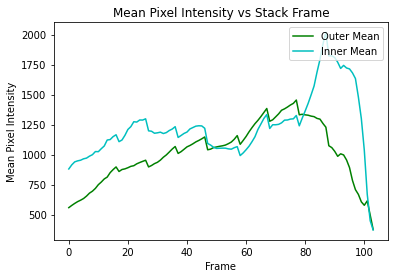

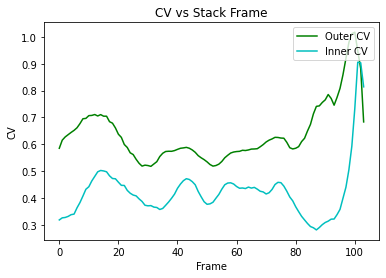

In [71]:
# Blue segmented distribution gif
name_of_file = 'segmented_blue.gif'
plotting_function = single_color_segment_dist
data = {}
data['points_comp'] = points_blue
data['outer_mean'] = []
data['inner_mean'] = []
data['outer_cv'] = []
data['inner_cv'] = []
plots.create_gif(name_of_file, plotting_function, percent_of_side, images, data, no_images=True)

# Outer and inner mean vs frame
plt.plot(data['outer_mean'], label='Outer Mean', color='g')
plt.plot(data['inner_mean'], label='Inner Mean', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('Mean Pixel Intensity')
plt.title(f'Mean Pixel Intensity vs Stack Frame')
plt.figure()

# Outer and inner CV vs frame
plt.plot(data['outer_cv'], label='Outer CV', color='g')
plt.plot(data['inner_cv'], label='Inner CV', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('CV')
plt.title(f'CV vs Stack Frame')

Text(0.5, 1.0, 'CV vs Stack Frame')

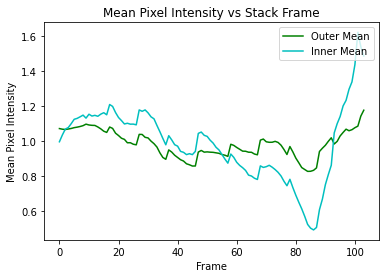

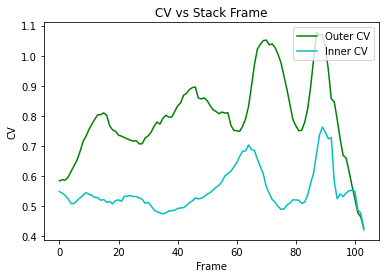

In [73]:
# Norm segmented distribution gif
name_of_file = 'segmented_norm.gif'
plotting_function = single_color_segment_dist
data = {}
data['points_comp'] = points_norm
data['outer_mean'] = []
data['inner_mean'] = []
data['outer_cv'] = []
data['inner_cv'] = []
plots.create_gif(name_of_file, plotting_function, percent_of_side, images, data, no_images=True)

# Outer and inner mean vs frame
plt.plot(data['outer_mean'], label='Outer Mean', color='g')
plt.plot(data['inner_mean'], label='Inner Mean', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('Mean Pixel Intensity')
plt.title(f'Mean Pixel Intensity vs Stack Frame')
plt.figure()

# Outer and inner CV vs frame
plt.plot(data['outer_cv'], label='Outer CV', color='g')
plt.plot(data['inner_cv'], label='Inner CV', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('CV')
plt.title(f'CV vs Stack Frame')

Text(0.5, 1.0, 'CV vs Stack Frame')

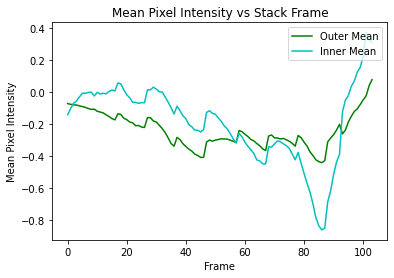

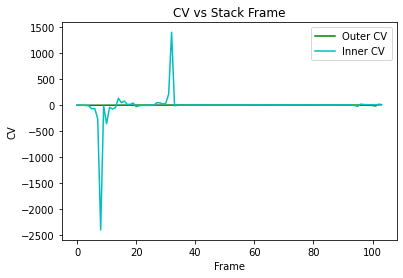

In [72]:
# Norm segmented distribution gif
name_of_file = 'segmented_norm_log.gif'
plotting_function = single_color_segment_dist
data = {}
data['points_comp'] = points_norm_log
data['outer_mean'] = []
data['inner_mean'] = []
data['outer_cv'] = []
data['inner_cv'] = []
plots.create_gif(name_of_file, plotting_function, percent_of_side, images, data, no_images=True)

# Outer and inner mean vs frame
plt.plot(data['outer_mean'], label='Outer Mean', color='g')
plt.plot(data['inner_mean'], label='Inner Mean', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('Mean Pixel Intensity')
plt.title(f'Mean Pixel Intensity vs Stack Frame')
plt.figure()

# Outer and inner CV vs frame
plt.plot(data['outer_cv'], label='Outer CV', color='g')
plt.plot(data['inner_cv'], label='Inner CV', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Frame')
plt.ylabel('CV')
plt.title(f'CV vs Stack Frame')

### Different amounts of segmentation

In [31]:
# Go through every center point and see the trend for CV and the mean for inner and outer
#Red
points_red_center = []
red_center, composite_center = red_composite[len(red_composite)//2]
for percent in range(10, 75, 5):
    points_red_center.append(helper.get_intensity_points(red_center, composite_center, ellipse_percentage=percent/100))
#Blue
points_blue_center = []
blue_center, composite_center = blue_composite[len(blue_composite)//2]
for percent in range(10, 75, 5):
    points_blue_center.append(helper.get_intensity_points(blue_center, composite_center, ellipse_percentage=percent/100))
#Norm
points_norm_center = []
norm_center, composite_center = red_center/blue_center, composite_center
for red_c, blue_c in zip(points_red_center, points_blue_center):
    points_norm_center.append((red_c[0]/blue_c[0], red_c[1]/blue_c[1]))
percents = [percent for percent in range(10, 75, 5)]

Text(0.5, 1.0, 'CV vs Ellipse Percentage')

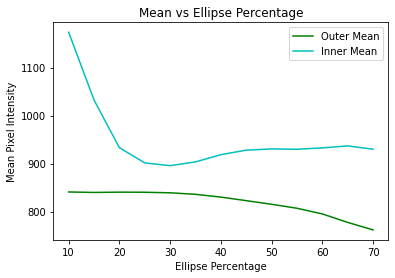

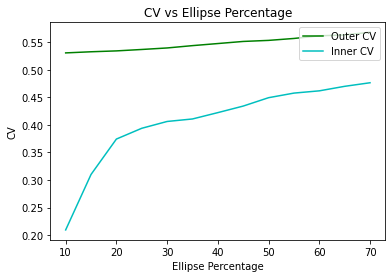

In [17]:
# Red
# Plot the mean for the center frame vs the ellipse percentage
plt.plot(percents, [np.mean(points[0]) for points in points_red_center], label='Outer Mean', color='g')
plt.plot(percents, [np.mean(points[1]) for points in points_red_center], label='Inner Mean', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Ellipse Percentage')
plt.ylabel('Mean Pixel Intensity')
plt.title(f'Mean vs Ellipse Percentage')
plt.figure()

# Plot CV for the center frame vs the ellipse percentage
plt.plot(percents, [np.std(points[0])/np.mean(points[0]) for points in points_red_center], label='Outer CV', color='g')
plt.plot(percents, [np.std(points[1])/np.mean(points[1]) for points in points_red_center], label='Inner CV', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Ellipse Percentage')
plt.ylabel('CV')
plt.title(f'CV vs Ellipse Percentage')

Text(0.5, 1.0, 'CV vs Ellipse Percentage')

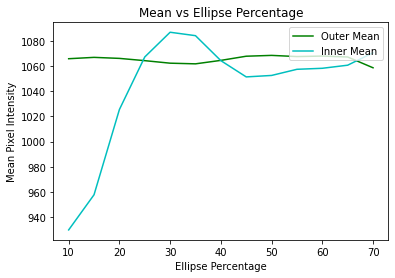

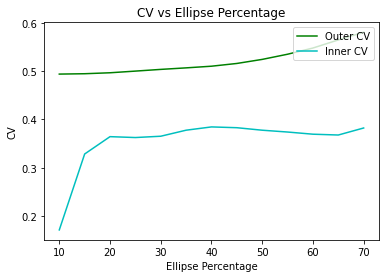

In [18]:
# Blue 
# Plot the mean for the center frame vs the ellipse percentage
plt.plot(percents, [np.mean(points[0]) for points in points_blue_center], label='Outer Mean', color='g')
plt.plot(percents, [np.mean(points[1]) for points in points_blue_center], label='Inner Mean', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Ellipse Percentage')
plt.ylabel('Mean Pixel Intensity')
plt.title(f'Mean vs Ellipse Percentage')
plt.figure()

# Plot CV for the center frame vs the ellipse percentage
plt.plot(percents, [np.std(points[0])/np.mean(points[0]) for points in points_blue_center], label='Outer CV', color='g')
plt.plot(percents, [np.std(points[1])/np.mean(points[1]) for points in points_blue_center], label='Inner CV', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Ellipse Percentage')
plt.ylabel('CV')
plt.title(f'CV vs Ellipse Percentage')

Text(0.5, 1.0, 'CV vs Ellipse Percentage')

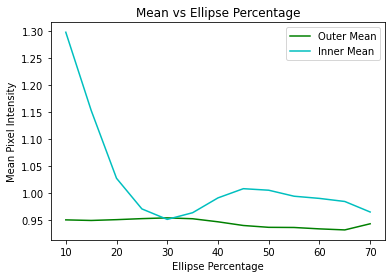

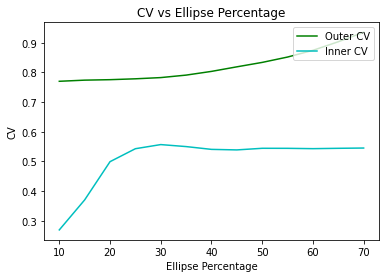

In [32]:
# Norm
# Plot the mean for the center frame vs the ellipse percentage
plt.plot(percents, [np.mean(points[0]) for points in points_norm_center], label='Outer Mean', color='g')
plt.plot(percents, [np.mean(points[1]) for points in points_norm_center], label='Inner Mean', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Ellipse Percentage')
plt.ylabel('Mean Pixel Intensity')
plt.title(f'Mean vs Ellipse Percentage')
plt.figure()

# Plot CV for the center frame vs the ellipse percentage
plt.plot(percents, [np.std(points[0])/np.mean(points[0]) for points in points_norm_center], label='Outer CV', color='g')
plt.plot(percents, [np.std(points[1])/np.mean(points[1]) for points in points_norm_center], label='Inner CV', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Ellipse Percentage')
plt.ylabel('CV')
plt.title(f'CV vs Ellipse Percentage')

Text(0.5, 1.0, 'CV vs Ellipse Percentage')

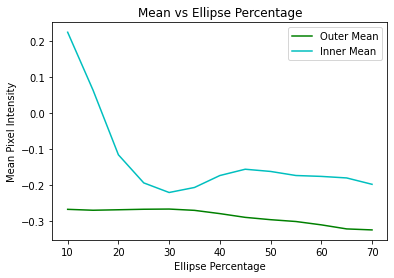

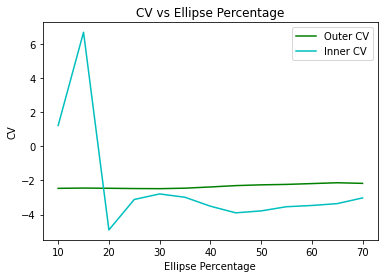

In [33]:
# Norm log
# Plot the mean for the center frame vs the ellipse percentage
plt.plot(percents, [np.mean(np.log(points[0])) for points in points_norm_center], label='Outer Mean', color='g')
plt.plot(percents, [np.mean(np.log(points[1])) for points in points_norm_center], label='Inner Mean', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Ellipse Percentage')
plt.ylabel('Mean Pixel Intensity')
plt.title(f'Mean vs Ellipse Percentage')
plt.figure()

# Plot CV for the center frame vs the ellipse percentage
plt.plot(percents, [np.std(np.log(points[0]))/np.mean(np.log(points[0])) for points in points_norm_center], label='Outer CV', color='g')
plt.plot(percents, [np.std(np.log(points[1]))/np.mean(np.log(points[1])) for points in points_norm_center], label='Inner CV', color='c')
plt.gca().legend(loc='upper right')
plt.xlabel('Ellipse Percentage')
plt.ylabel('CV')
plt.title(f'CV vs Ellipse Percentage')